<center>
    
## <font color='maroon'>ASTR 20500</font>
## <font color='maroon'>Introduction to Python programming<br> with elements of astro statistics</font>
## <font color='maroon'>Student pdf and $\chi^2$ pdf</font>
</center>


### <font color='darkblue'>Recap: random numbers drawn from a pdf</font>

A sequence of $N_r$ random numbers is said to be *drawn* from a probability density function (pdf), when their histogram (number of random samples per interval width, or <tt>density=True</tt>) tends to that pdf as $N_r$ increases. 


In [ ]:
from matplotlib import pylab as plt

def plot_hist(x, xlims=None, ylims=None, bins = 'auto', 
              alpha=1, figsize = (6,6), density = True, 
              xlabel = 'x', ylabel=None):
    '''
    Plot histogram of values in x 
    
    where x is either a list or numpy array
    the other arguments are simply passed to Pylab function hist 
    '''
    plt.figure(figsize = figsize) # define figure and its dimensions
    plt.xlabel(xlabel) # x-axis label
    if ylabel is not None: plt.ylabel(ylabel)
    if xlims is not None: plt.xlim(xlims)
    if ylims is not None: plt.ylim(ylims)
    plt.ylabel('histogram') # y-axis label
    plt.hist(x, density = density, alpha=alpha, 
             color = 'slateblue', bins = bins) # produce histogram of xs values


In [ ]:
from math import e, pi

def gaussian_pdf(x, mu=0., sigma=1.):
    """
    Returns value of the Gaussian pdf with input mu, sigma for input x 

    Parameters:
    -----------
    x:     a float or a 1d numpy array of floats, input x value(s)
    mu:    a float, mean of the Gaussian (default 0)
    sigma: a float, st. deviation of the Gaussian (default 1.0)
    
    Returns:
    --------
    
    g(x): a float - value of the Gaussian pdf for input x value(s)
    """
    assert(sigma !=0.)

    return 1./(2.*pi)**0.5/sigma * e**(-0.5*((x-mu)/sigma)**2)

In [ ]:
def gauss_line(xmin, xmax, dx=0.01, mu=0., sigma=1.):
    '''
    construct lists of x values and corresponding Gaussian pdf values with specified mu and st dev sigma
    
    Returns:
    xp, pgauss - lists of floats containing x values in the range [xmin,xmax] and pdf values p_Gauss(x)
    '''
    pgauss = []
    xp = []
    x = xmin # start at the minimum
    dx = dx * (xmax - xmin) # increase x with step dx

    while x <= xmax: 
        pgauss.append(gaussian_pdf(x, mu=mu, sigma=sigma))
        xp.append(x)
        x = x + dx
        
    return xp, pgauss

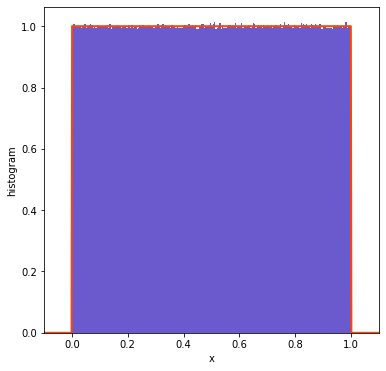

In [ ]:
import numpy as np 

nr = 10000000
xr = np.random.uniform(size=nr)
plot_hist(xr)
xg = np.linspace(-0.5,1.5,1000) # useful np function to produce a grid of values
yg = np.ones_like(xg)
yg[(xg<0) | (xg>1)] = 0.
plt.xlim(-0.1, 1.1)
plt.plot(xg, yg, lw=2, c='orangered'); plt.show()

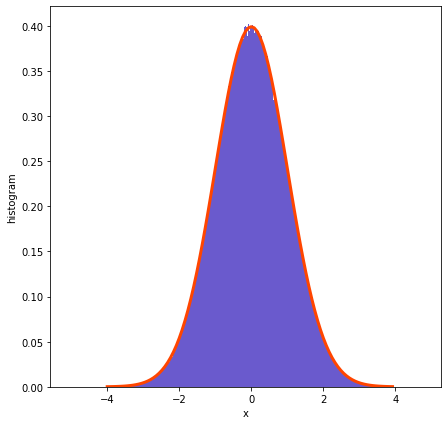

In [ ]:
import numpy as np 

nr = 1000000
mu, sigma = 0, 1.
xr = np.random.normal(loc=mu, scale=sigma, size=nr)

xp, pgauss = gauss_line(-4, 4,  mu=mu, sigma=sigma)
plot_hist(xr, density=True, bins='auto', figsize=(7,7))
plt.plot(xp, pgauss, c='orangered', lw=3., label='Gaussian pdf'); plt.show()

### <font color='darkblue'>Central Limit Theorem (CLT) and error of the mean</font>


In [ ]:
import numpy as np
import matplotlib.pylab as plt

No handles with labels found to put in legend.


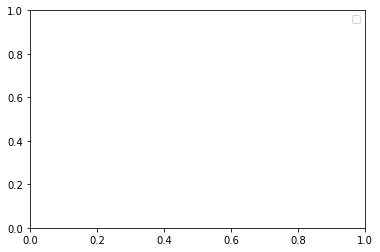

In [ ]:
ns = 100000
alpha = 0.8
for nr, color in zip([10, 100, 1000], ['orangered', 'g', 'slateblue']):
    # computing ns sums of random numbers with numpy here
    pass

plt.legend(loc='best')
plt.show()

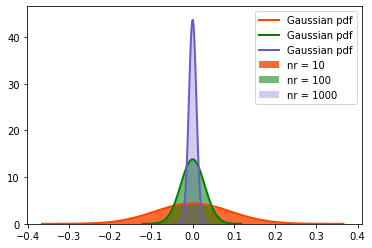

In [ ]:
ns = 100000
alpha = 0.8
for nr, color in zip([10, 100, 1000], ['orangered', 'g', 'slateblue']):
    xr = np.random.uniform(size=ns*nr).reshape((ns,nr))
    sxr = np.sum(xr, axis=1) / nr 
    sxr -= np.mean(sxr)
    plt.hist(sxr, alpha=alpha, color=color, 
             density=True, bins='auto', label=f'nr = {nr:d}')
    alpha -= 0.25
    mu, sigma = 0., (nr/12)**0.5 / nr 
    xp, pgauss = gauss_line(min(sxr), max(sxr),  mu=mu, sigma=sigma)
    plt.plot(xp, pgauss, c=color, lw=2., label='Gaussian pdf')
plt.legend(loc='best')
plt.show()

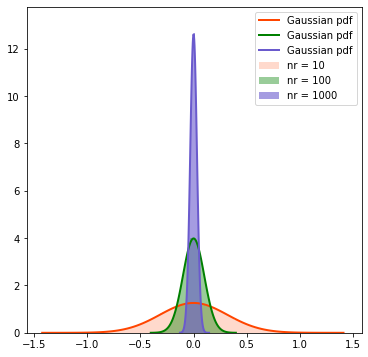

In [ ]:
ns = 100000
alpha = 0.2
plt.figure(figsize=(6,6))
for nr, color in zip([10, 100, 1000], ['orangered', 'g', 'slateblue']):
    xr = np.random.normal(size=ns*nr).reshape((ns,nr))
    sxr = np.sum(xr,axis=1) / nr 
    sxr = sxr - np.mean(sxr)
    plt.hist(sxr,  alpha=alpha, density=True, 
            color=color, bins = 'auto', label=f'nr = {nr:d}') # produce histogram of xs values
    mu, sigma = 0., 1/nr**0.5
    xp, pgauss = gauss_line(min(sxr), max(sxr),  mu=mu, sigma=sigma)
    plt.plot(xp, pgauss, c=color, lw=2., label='Gaussian pdf')
    alpha += 0.2
plt.legend(loc='best'); plt.show()

### <font color='darkblue'>Key takeways: </font> 




### <font color='darkblue'>Uncertainty (error) of the mean</font> 

* the CLT implies that pdf of the mean of $n$ measurements can be accurately approximated by the Gaussian pdf centered on the true value of the quantity we are measuring $x_t$

$$ p(\bar{x}\vert x_t) = \frac{1}{\sqrt{2\pi}\sigma_{\bar{x}}}\, \exp\left[-\frac{(\bar{x}-x_t)^2}{2\sigma_{\bar{x}}^2}\right]$$

* Calculations using linearity of variance for independent measurements show that standard deviation of this Gaussian pdf should be

$$\sigma_{\bar{x}}=\frac{\sigma_x}{\sqrt{n}}$$

* This means that $\bar{x}$ is a Gaussian random number *drawn* from the pdf above. 

**_Note_**: the Gaussian pdf above is symmetric wrt $\bar{x}$ and $x_t$. We can view it as a distribution of $\bar{x}$ with the mean of $x_t$ or distribution of $x_t$ with the mean of $\bar{x}$. 

Its proper meaning, however, is pdf of the mean measurement $\bar{x}$ around the true value, $x_t$. This is why pdf is written as $p(\bar{x}\vert x_t)$ above. 

When we don't know properties of the pdf from which measurements are drawn and so don't know its $\sigma_x$ (which is usually the case), we can only approximate it with the sample standard deviation

$$\sigma_{\bar{x}}=\sqrt{\sigma^2_{\bar{x}}}=\sqrt{\frac{\sigma^2_x}{n}}=\sqrt{\frac{\sum\limits_{i=1}^n (x_i-\bar{x})^2}{n(n-1)}\,}$$

where the sample mean $\bar{x}=(1/n)\,\sum_{i=0}^n x_i$

### <font color='darkblue'>What about is the pdf of this quantity?</font>

$$z=\frac{(\bar{x}-x_t)}{\sigma_{\bar{x}}}$$

In [ ]:
ns, nr = 100000, 100

xr = np.random.normal(size=ns*nr).reshape((ns,nr))

xmean = np.mean(xr, axis=1)
xstd  = np.std(xr, axis=1, ddof=1)

z = xmean/(xstd/nr**0.5)

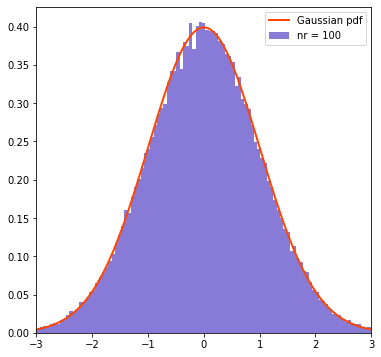

In [ ]:
plt.figure(figsize=(6,6))
#plt.yscale('log'); 
plt.xlim(-3, 3); #plt.ylim(1.e-4, 0.9)
plt.hist(z,  alpha=0.8, density=True, 
        color=color, bins = 'auto', label=f'nr = {nr:d}') # produce histogram of xs values

mu, sigma = 0., 1
xp, pgauss = gauss_line(z.min(), z.max(), dx=0.001, mu=mu, sigma=sigma)
plt.plot(xp, pgauss, c='orangered', lw=2., label='Gaussian pdf')


plt.legend(loc='best'); plt.show()

### <font color='darkblue'>Student's $t$-distribution</font>

For a sample of $n$ random numbers $x$  drawn from a Gaussian distribution with the true mean $\mu$ and the sample mean $\bar{x}$ and *sample* standard deviation $\sigma_{x}$, the pdf of 

$$t = \frac{\bar{x}-\mu}{\sigma_x/\sqrt{n}}=\frac{\bar{x}-\mu}{\sigma_{\bar{x}}}$$ is

$$p(t) = {\rm constant} \times \,\left(1+{t^2\over n-1}\right)^{-\frac{n}{2}}.$$


$${\rm constant} = \frac{\Gamma\left({n\over 2}\right)}{\sqrt{(n-1)\pi}\,\Gamma\left({n-1\over 2}\right)}.$$

where $\Gamma$ is the same *gamma function as before. $\nu = n-1$ is called the *number of degrees of freedom* of the distribution.

$\Gamma$ function is defined such that  

$$\Gamma(x) = \int\limits_0^\infty z^{x-1} e^{-z} dz$$

It can be computed using SciPy's function [<tt>scipy.special.gamma</tt>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html) . 

In [ ]:
from scipy.special import gamma # first encounter with the scipy (scientific Python) module

def student_pdf(xt, nu):
    return gamma(0.5*(nu+1)) / gamma(0.5*nu) / (nu*np.pi)**0.5 / (1 + xt**2/nu)**(0.5*(nu + 1))

### <font color='darkblue'>William Sealy Gosset - the "Student"</font>

Worked at the Guinness brewery in Dublin and was working on the problem of how to estimate properties of large quantities of barley from small samples of it. 
Worked out what is now called Student's $t$-distribution in a [1908 paper](https://www.jstor.org/stable/2331554?seq=1) published under the pen name Student. 

<br>
<center><img width=400 src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/William_Sealy_Gosset.jpg/800px-William_Sealy_Gosset.jpg"></img></center>

### <font color='darkblue'>Guinness truck on the streets of Dublin</font>

Guinness produces large quantities of beer - this was the case in 1908 and is still the case now. Estimating quality of large amount of ingredients required to produce truckload after truckload of beer, requires clever statistical approach. The statistics developed by Gosset was viewed as a technological business secret by Guinness brewery at the time. 

<br>
<center>
<img width=500 src="https://astro.uchicago.edu/~andrey/classes/a205f20/img/guinness_truck.png"></img></center>

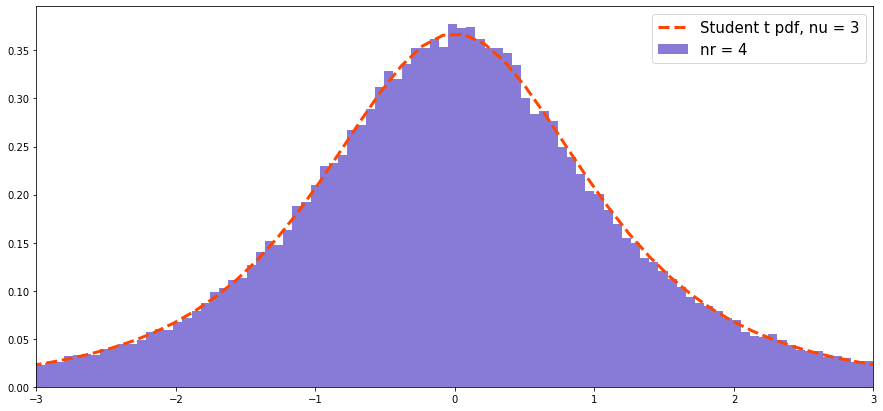

In [ ]:
plt.figure(figsize=(15,7))
plt.xlim(-3, 3); #plt.ylim(1.e-4, 0.9)
plt.hist(z,  alpha=0.8, density=True, 
        color='slateblue', bins = 'auto', label=f'nr = {nr:d}') # produce histogram of xs values

xt = np.linspace(z.min(), z.max(), 1000)
plt.plot(xt, student_pdf(xt, nr-1), '--', c = 'orangered', lw=3, label = f'Student t pdf, nu = {nr-1:d}')

plt.legend(loc = 'best', fontsize=15)
plt.show()

### <font color='darkblue'>$z$ is drawn from Student pdf with $n-1$ degrees o freedom</font>

where $n$ is the size of sample that was used to compute $\bar{x}$ and $\sigma_{\bar{x}}$. 

$$z=\frac{(\bar{x}-x_t)}{\sigma_{\bar{x}}}$$

for $n>10$ Student pdf is pretty close to Gaussian pdf. 

### <font color='darkblue'>Suppose $z$ is drawn from pdf close to Gaussian what is the distribution of $z^2$?</font>

$$z^2=\frac{(\bar{x}-x_t)^2}{\sigma_{\bar{x}}^2}$$

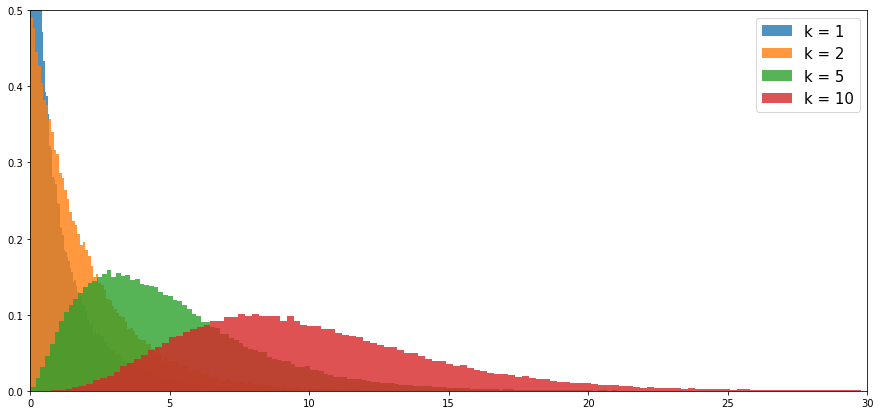

In [ ]:
ns, nr = 100000, 4

z = np.random.normal(size=ns*nr).reshape((ns,nr))

plt.figure(figsize=(15,7))
plt.ylim(0,0.5); plt.xlim(0,30)
for nr, alpha in zip([1, 2, 5, 10], [1, 0.8, 0.6, 0.4]):
    z = np.random.normal(size=ns*nr).reshape((ns,nr))
    # sum squares of nr Gaussian numbers 
    sz = np.sum(z**2, axis=1)
    plt.hist(sz,  alpha=0.8, density=True, bins = 'auto', label=f'k = {nr:d}') # produce histogram of xs values

plt.legend(loc = 'best', fontsize=15)
plt.show()

### <font color='darkblue'>The $\chi^2$ probability density function</font>

If $x_i$ are *$k$ random numbers drawn from a Gaussian pdf of  mean=0 and variance=1*, the sum of the squares of $x_i$ has distribution described by the $\chi^2$ pdf with $k$ "*degrees of freedom*":

$$p_{\chi^2}(x,k)=\chi^2(x,k) = \begin{cases}\mathrm{const}\times\, x^{{k/2}-1}\, e^{-x/2}\ \ \mathrm{for}\ x\geq 0.\\
0\ \ \mathrm{for}\ x<0.\end{cases}$$ 

where constant is given by the following expression that involves the gamma function that we've encountered before in the normalization of the Poisson and $t$-distribution. 

$$\mathrm{const}= \frac{1}{2^{k/2}\,\Gamma(k/2)},$$

where, as before, $\Gamma(x)$ is a special function called the [***gamma function.***](https://en.wikipedia.org/wiki/Gamma_function)

$\Gamma$ function is defined such that  

$$\Gamma(x) = \int\limits_0^\infty z^{x-1} e^{-z} dz$$

It can be computed using SciPy's function [<tt>scipy.special.gamma</tt>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html) . 

**_Note_**: The mean value of $\chi^2(k)$ pdf is $k$ and its variance is $2k$. Thus for the ***reduced $\chi^2$ function***, $\chi^2_k = \chi^2(x,k)/k$, for which the mean is 1 and variance is $2/k$. This can also be used as a "goodness of fit" test. 


In [ ]:
def chi2_pdf(xt, k):
    return 1.0 / (2**(k/2) * gamma(0.5 * k)) * xt**(k/2-1) * np.exp(-xt/2) 

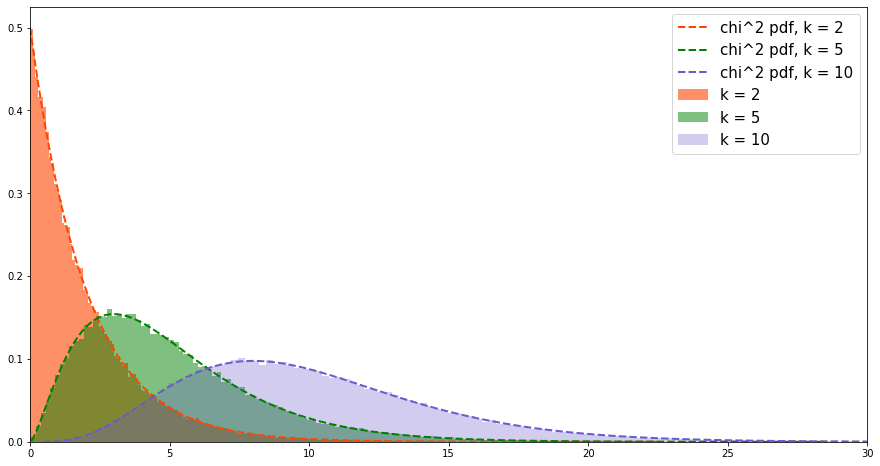

In [ ]:
ns = 100000
plt.figure(figsize=(15,8))
for k, color, alpha in zip([2, 5, 10], ['orangered', 'g',  'slateblue'], [0.6, 0.5, 0.3]):
    z = np.random.normal(size=ns*k).reshape((ns,k))
    sz = np.sum(z**2, axis=1)
    plt.hist(sz,  alpha=alpha, density=True, 
            color=color, bins = 'auto', label=f'k = {k:d}') # produce histogram of xs values
    xt = np.linspace(sz.min(), sz.max(), 1000)
    plt.plot(xt, chi2_pdf(xt,k), '--', lw=2, c = color, label = f'chi^2 pdf, k = {k:d}')
plt.xlim(0,30)
plt.legend(loc='best', fontsize=15)
plt.show()

### <font color='darkblue'>Where does the need for $\chi^2$ pdf arise?  

### <font color='darkblue'>Suppose we have 2 independent measurements $\bar{x}_1$ and $\bar{x}_2$ of some physical quantity</font>

These may have different uncertainties $\sigma_1$ and $\sigma_2$. What is the joint pdf of these two measurements? 

To be specific, let's assume these are measurements of the width of the classroom table measured by two sets of students at two opposite ends of the table. 

We adopt a *model* that the table has constant width along its length and the true width is some value $x_t$. What follows is mathematics toolkit used in statistics to decide which values of $x_t$ agree with measurements and which do not. If our table was narrower at one end than the other, such test can also potentially be used to demonstrate that our model of the constant width is not a good description of the real table. 

Probability for $\bar{x}_1$ to be within $[\bar{x}_1, \bar{x}_1 + \Delta x_1]$ is $p(\bar{x}_1\vert x_t)\Delta x_1$, where $p$ is pdf of $\bar{x}_1$ (usually Gaussian)  and likewise for $\bar{x}_2$. 

Probabilities of independent outcomes are multiplied if we want to get probability of outcome 1 **_and_** outcome 2, so the joint probability is $p(\bar{x}_1\vert x_t)p(\bar{x}_2\vert x_t)\Delta x_1\Delta x_2$ and the joint pdf is

$$p(\bar{x}_1, \bar{x}_2\vert x_t) = p(\bar{x}_1\vert x_t)\,p(\bar{x}_2\vert x_t)=\frac{1}{\sqrt{2\pi}\sigma_{\bar{x}_1}}\frac{1}{\sqrt{2\pi}\sigma_{\bar{x}_2}}\, \exp\left[-\frac{(\bar{x}_1-x_t)^2}{2\sigma_{\bar{x}_1}^2}-\frac{(\bar{x}_2-x_t)^2}{2\sigma_{\bar{x}_2}^2}\right].$$

$$\ln p(\bar{x}_1, \bar{x}_2\vert x_t) = \ln p(\bar{x}_1\vert x_t) +\ln p(\bar{x}_2\vert x_t) = \ln \frac{1}{\sqrt{2\pi}\sigma_{\bar{x}_1}}\frac{1}{\sqrt{2\pi}\sigma_{\bar{x}_2}} - \left[\frac{(\bar{x}_1-x_t)^2}{2\sigma_{\bar{x}_1}^2}+\frac{(\bar{x}_2-x_t)^2}{2\sigma_{\bar{x}_2}^2}\right]\approx {\rm const} -\frac{1}{2}(z_1^2 + z_2^2)$$

**_Note_**: above we use the property that $\ln(e^x) =x$ and that logarithm of a product is equal to the sum of logarithms of the product terms: $\ln(xyz) = \ln x + \ln y +\ln z$, etc. 

### <font color='darkblue'>Similarly for $n$ independent measurements $\bar{x}_1$, $\bar{x}_2$, $\ldots$, $\bar{x}_n$</font>

with standard deviations (uncertainties) $\sigma_1$, $\sigma_2$, $\ldots$, $\sigma_n$, the joint pdf of these $n$ measurements is 

\begin{eqnarray}
\ln p(\bar{x}_1, \bar{x}_2, \ldots, \bar{x}_n\vert x_t) &=& \ln p(\bar{x}_1\vert x_t) +\ln p(\bar{x}_2\vert x_t) +\ldots + \ln p(\bar{x}_n\vert x_t)\\ &=& \ln \frac{1}{\sqrt{2\pi}\sigma_{\bar{x}_1}}\frac{1}{\sqrt{2\pi}\sigma_{\bar{x}_2}}\ldots \frac{1}{\sqrt{2\pi}\sigma_{\bar{x}_n}}- \left[\frac{(\bar{x}_1-x_t)^2}{2\sigma_{\bar{x}_1}^2}+\frac{(\bar{x}_2-x_t)^2}{2\sigma_{\bar{x}_2}^2}+\ldots+\frac{(\bar{x}_n-x_t)^2}{2\sigma_{\bar{x}_n}^2}\right]\\
&\approx& {\rm const} -\frac{1}{2}(z_1^2 + z_2^2+\ldots+z_n^2)
\end{eqnarray}

Thus, natural log of the joint pdf is directly related to the pdf of the sum of squares of Gaussian numbers with zero mean and st deviation of 1 ($z_i$). 

For this reason $\chi^2$ pdf is used as a "**_goodness of fit_**" statistic to judge whether measurements are consistent with a given value of $x_t$. 


Note, howevr, that $\ln p$ is related to $-\sum_i z_i^2/2$, so $\ln p$ is *maximized* when $\sum_i z_i^2$ is smallest in magnitude. 

### <font color='darkblue'>The cumulative distribution of $\chi^2$ pdf - the $p$-value: </font>

$$P_{\chi^2_k}(<x)=\int\limits_0^x p_{\chi^2_k}(x)dx = P\left({x\over 2}, {k\over 2}\right),$$

where $P(x,a)$ is the [regularized lower incomplete $\gamma$-function](), which can be computed using [<tt>scipy.special.gammainc</tt>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammainc.html) function. 

***The $\chi^2$ test for a model with a single model parameter $x_t$***

Suppose we are free to choose how to adjust $x_t$ value until $P_{\chi^2}(x>E_2,n-1)$ is minimized, which means that the probability of measurements for this $x_t$ is *maximized*. 

Once $P_{\chi^2}(x>E_2,n-1)$ is minimized we can assess how consistent the resulting $x_t$ value is with the measurements via the following $\chi^2$ test:

* Compute $E_2=\sum\limits_{i=1}^{n} z_i^2$ from using measurements and the value of $x_t$ for which $E_2$ is minimal. 


* Estimate the probability that a value $x_t$ is *statisticaly consistent* with measurements, by computing the probability that 
$$P_{\chi^2}(x>E_2,n-1)=1-P_{\chi^2}(x<E_2,n-1).$$

**_Such probability is called the $p$-value_** in tests of this kind. 

**_Note_**: If you did exercise 4 on quasars in hw 2, the probability to observe 11 quasars or more in this exercise is also what's calle $p$-value in statistical tests. 

**_Note_**: The $n-1$ is used for degrees of freedom because for one measurement $n=1$ we can adjust $x_t$ to give $z_i=0$ exactly. In general, if our model for $x_t$ has $k$ parameters, the number of degrees of freedom used in the test is $n-k$.  

### <font color='darkblue'>"Goodness of fit" test criteria using the reduced $\chi^2$ distribution</font>


Specifically, we use the estimated value of $E_2/(n-k)$  to conclude how close a model with $k$ parameter is to the perfect fit of data (measurements):

| $E_2/(n-k)$ | description |
| --- | --- |
| $\ll 1$ | model "overfits" the data (goes too close to the data values) |
| $\approx 1$ | model is close to perfect |
| $>1$ | model may be close but is not capturing some aspect of the data |
| $\gg 1$ | model is not a correct description of the data |


If all of this sounds a bit abstract, don't worry, you will see examples and applications of this test in practice. For now, you just need to get familiar with the overall logic, terminology, and concepts. 